In [1]:
# Disply sementic similarity network
def draw_graph3(networkx_graph,notebook=True,output_filename='graph.html',show_buttons=True,only_physics_buttons=False,
                height=None,width=None,bgcolor=None,font_color=None,pyvis_options=None):
    """
    This function accepts a networkx graph object,
    converts it to a pyvis network object preserving its node and edge attributes,
    and both returns and saves a dynamic network visualization.
    Valid node attributes include:
        "size", "value", "title", "x", "y", "label", "color".
        (For more info: https://pyvis.readthedocs.io/en/latest/documentation.html#pyvis.network.Network.add_node)
    Valid edge attributes include:
        "arrowStrikethrough", "hidden", "physics", "title", "value", "width"
        (For more info: https://pyvis.readthedocs.io/en/latest/documentation.html#pyvis.network.Network.add_edge)
    Args:
        networkx_graph: The graph to convert and display
        notebook: Display in Jupyter?
        output_filename: Where to save the converted network
        show_buttons: Show buttons in saved version of network?
        only_physics_buttons: Show only buttons controlling physics of network?
        height: height in px or %, e.g, "750px" or "100%
        width: width in px or %, e.g, "750px" or "100%
        bgcolor: background color, e.g., "black" or "#222222"
        font_color: font color,  e.g., "black" or "#222222"
        pyvis_options: provide pyvis-specific options (https://pyvis.readthedocs.io/en/latest/documentation.html#pyvis.options.Options.set)
    """

    # import
    from pyvis import network as net

    # make a pyvis network
    network_class_parameters = {"notebook": notebook, "height": height, "width": width, "bgcolor": bgcolor, "font_color": font_color}
    pyvis_graph = net.Network(**{parameter_name: parameter_value for parameter_name, parameter_value in network_class_parameters.items() if parameter_value})

    # for each node and its attributes in the networkx graph
    for node,node_attrs in networkx_graph.nodes(data=True):
        pyvis_graph.add_node(node,**node_attrs)

    # for each edge and its attributes in the networkx graph
    for source,target,edge_attrs in networkx_graph.edges(data=True):
        # if value/width not specified directly, and weight is specified, set 'value' to 'weight'
        if not 'value' in edge_attrs and not 'width' in edge_attrs and 'weight' in edge_attrs:
            # place at key 'value' the weight of the edge
            edge_attrs['value']=edge_attrs['weight']
        # add the edge
        pyvis_graph.add_edge(source,target,**edge_attrs)

    # turn buttons on
    if show_buttons:
        if only_physics_buttons:
            pyvis_graph.show_buttons(filter_=['physics'])
        else:
            pyvis_graph.show_buttons()

    # pyvis-specific options
    if pyvis_options:
        pyvis_graph.set_options(pyvis_options)

    # return and also save
    return pyvis_graph.show(output_filename)

In [2]:

import pandas as pd

df_80_1 = pd.read_csv('df_75_1.csv')

In [5]:
# Defining the network (nodes are policies and edges are sementic similarity scores)

import community
import networkx as nx
# make the networkx graph object: directed graph
g = nx.from_pandas_edgelist(df_80_1, 'query_paper', 
                            'top_papers_id_all', 
                            edge_attr='cosine_similarity')
len(g.nodes())

287

In [6]:
# Community detection and setting color configuration

#first compute the best partition
partition_object = community.best_partition(g)
# first elements of the partition dictionary
# this is a mapping between paper and community
list(partition_object.items())[0:10]
# extract the communities for each album 
values = [partition_object.get(node) for node in g.nodes()]
color_list = ["#019c3e",
"#9113a2", "#53e063", "#543abc", "#85d944", "#7f51d9", "#70c32b", "#5d5be3", "#b5ce1c", "#8471fd", "#61b10f", "#a75de6", "#49b529", "#b046cb",
"#27ca53", "#ae0099", "#01d069", "#c53abe", "#009d1c", "#ef68ea", "#7fdc57", "#a872fe", "#a6d636", "#014bc2", "#d5ca17", "#0063df",
"#7cb000", "#6b79ff", "#9fb300", "#6437af", "#b3d342", "#7532a0", "#63de79", "#e649c6", "#01b351", "#ff67e3", "#007f11", "#ee33a9",
"#00cc83", "#cd008f", "#00b96a", "#ee2599", "#2ae0a2", "#fb2e95", "#8bda69", "#b70088", "#69a000", "#ff87fc", "#106c00", "#b987ff",
"#e2c52d", "#0285f7", "#fcb113", "#0092fe", "#dea500", "#0159bd", "#fcbb3a", "#006cd0", "#e59500", "#6e8bff", "#b4a000",
"#3e48aa", "#c2cf4e", "#822b92", "#a2d662", "#9f007a", "#93d878", "#8e2185", "#538600",
"#ec92ff", "#008b3c", "#ff3a8f", "#00a667", "#d0006c", "#00dac4", "#dd2231", "#29d9ed", "#b51600", "#3edbd1", "#d82d23", "#01c6a9",
"#c3002c", "#46dbc9", "#f74a3b", "#03c8c1", "#e04022", "#45b0ff", "#d85102", "#0278d3", "#ff9424", "#0279c8", "#e58400", "#8899ff",
"#fa7720", "#018cd1", "#ed5227", "#00bcbb", "#a41707", "#5dd8db", "#a70a1b", "#6adba4", "#bd006f", "#8cd88b", "#c9005d", "#01aa7d",
"#bf004a", "#68d9bf", "#a8042e", "#87d89c", "#8c277f", "#688600", "#b299ff", "#c09100", "#88abff", "#c98300", "#016aa6",
"#edc143", "#78378a", "#d8c85a", "#6f3e85", "#ae8e00", "#dba0ff", "#3e6f00", "#ff6ec4", "#017027", "#ff5ca1", "#206003",
"#ff95e1", "#006025", "#ff5584", "#017c48", "#ff5375", "#02a694", "#ff5958","#01afb8","#be4100","#0092c8","#c46200","#0096c2","#b24c00",
"#00adc6","#b05800","#b2a8ff","#958800","#d8aeff","#627200","#e4afff","#195f22","#ffaaf4","#006131","#ff8cca","#425b08","#ccb3ff",
"#bd7200","#a7bdff","#983b00","#017da8","#ffb554","#5d468a","#b8d076","#873076","#7ed8b0","#991c63","#017f5d","#ff6672","#00896d",
"#ff7b9c","#375c1e","#ecb3f0","#757100","#4b4d89","#ecc065","#2f5386","#ff9054","#018a84","#ff8164","#73cbbc","#9d1f3f","#a8d19b",
"#98264c","#bbce8b","#8b3161","#ddc573","#6e4276","#9a7b00","#cbbef9","#a16e00","#9a9ed5","#9e6300","#6e7eb2","#ff9a5a","#357f65",
"#ff7d79","#54865e","#ff89b0","#4d5801","#fdaee2","#6c5b00","#feb0d0","#4e571e","#ff8b9a","#728a57","#7b3d6d","#fbba69",
"#886b9b","#856200","#ffabb6","#5d5317","#ff9fa5","#6e4c10","#ff8c89","#94a771","#9a282c","#d9c587","#8e3343","#e8c07d","#955672",
"#f6bb71","#813e47","#ffad72","#844540","#f2bc88","#8d381b","#c3ac77","#853f03","#b36e82","#865100","#eca499","#7c4516","#feb591",
"#704b26","#ff8d61","#7a452c","#ffa891","#843f21","#ff967b","#823f33","#bc9268","#a86a59","#907144","#c98e73"]
color_list = color_list[0:len(set(values))]
import numpy as np
# and we make a dictionary where we map each
# community number to a specific color code
color_dict = pd.Series(color_list,
        index=np.arange(0,len(set(values)))).to_dict()

# use the color dictionary to update the partition object:
# we replace the number of the community with the
# color hex code
for key, value in partition_object.items():
    partition_object[key] = color_dict[value]
# set the node attribute color in networkx object
# using the above mapping
nx.set_node_attributes(g, partition_object, 'color')

In [7]:
#  Plotting the network
# make the pyviz interactive plot
# this will save out an html file to the directory
# where this script is
# plot will also be shown in the notebook
draw_graph3(g, height = '1000px', width = '1000px', 
            show_buttons=False,  
            output_filename='graph_output_communities_313_75.html', notebook=True)

In [1]:
import pandas as pd

df_community_new = pd.read_csv('/home/ubuntu/storage_data_new/python_scripts/STIP/clustering_report/embeddingstfidfweightedtest/df_community_new_75.csv')

In [14]:
df_community_new[df_community_new['index'] == 171]

,index,country,year,period,doc_id,title,text_original,text_translated,text_clean,language,query_paper,paper_community
158,171,Hungary,2020.0,pre-covid,HGRY_B4P2,Hungary’s Artificial Intelligence Strategy 202...,"Minister's Greeting Beyond doubt, in 2020 ...","""x"" ""1"" ""Minister's Greeting Beyon...",doubt technology artificial_intelligence ai ev...,en,171,4


In [2]:
df_community_new.head(2)

,index,country,year,period,doc_id,title,text_original,text_translated,text_clean,language,query_paper,paper_community
0,1,Austria,2021.0,intra-covid,AT_B1C1,Österreichischer Aufbau- und Resilienzplan 202...,Österreichischer Aufbau- und Resilienzpl...,"""x"" ""1"" ""Austrian development and resilience p...",development resilience_plan content objective ...,de,1,0
1,2,Austria,2020.0,intra-covid,AT_B1C2,Digitaler Aktionsplan Austria,Digital...,"""x"" ""1"" ""More digital Action plan Austria ...",digital plan content future crisis-proof innov...,de,2,14


In [3]:
community_name_list = ['Innovation and S&T Research Development', 'Investment programme which involves government support', 'Government support for transforming digital infrastructure']

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


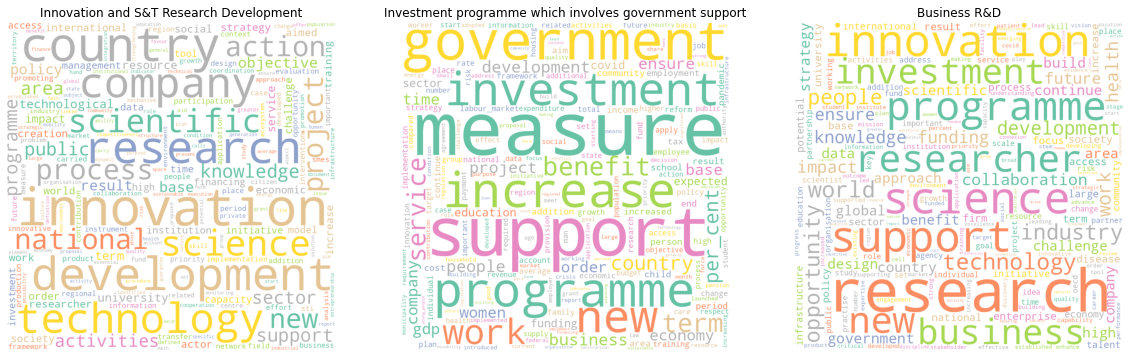

In [2]:
# Plotting common words within each community
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import STOPWORDS
stop_words = set(STOPWORDS).union(stopwords.words("english"))
stop_words = stop_words.union(['let', 'mayn', 'ought', 'oughtn', 
                               'shall'])
community_name_list = ['Innovation and S&T Research Development', 'Investment programme which involves government support', 'Business R&D']                              
df_community_100 = pd.DataFrame(df_community_new.paper_community.value_counts()[:3])
df_community_100 = df_community_100.reset_index()

fig, ax = plt.subplots(1, len(df_community_100), figsize=(20, 8))
for i in range(len(df_community_100)):
    community_name = community_name_list[i]
    topic = df_community_100['index'][i]
    text = ' '.join(df_community_new.loc[df_community_new['paper_community']==topic, 'text_clean'].values)    
    wordcloud = WordCloud(width=1000, height=1000, random_state=1, background_color='White', 
                          colormap='Set2', collocations=False, stopwords=stop_words).generate(text)
    ax[i].imshow(wordcloud) 
    ax[i].set_title(f"{community_name}")
    # No axis details
    ax[i].axis("off");

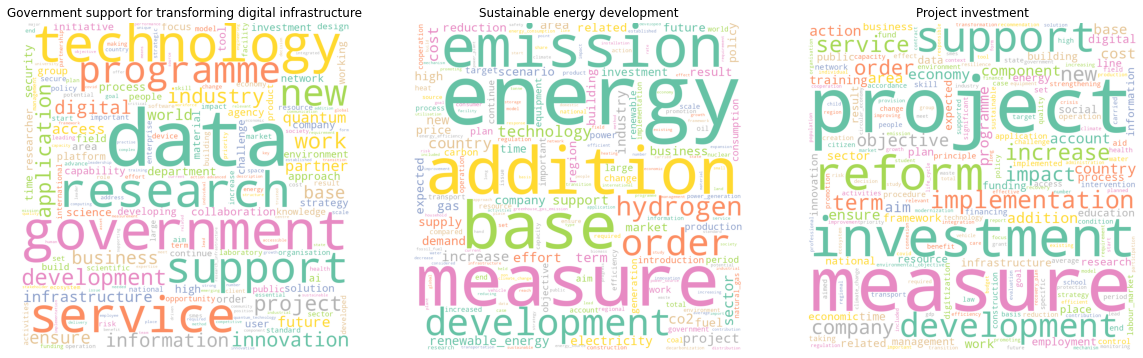

In [23]:
# Plotting common words within each community

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import STOPWORDS
stop_words = set(STOPWORDS).union(stopwords.words("english"))
stop_words = stop_words.union(['let', 'mayn', 'ought', 'oughtn', 
                               'shall'])
community_name_list = ['Government support for transforming digital infrastructure', 'Sustainable energy development', 'Project investment']                              
df_community_100 = pd.DataFrame(df_community_new.paper_community.value_counts()[3:6])
df_community_100 = df_community_100.reset_index()

fig, ax = plt.subplots(1, len(df_community_100), figsize=(20, 8))
for i in range(len(df_community_100)):
    community_name = community_name_list[i]
    topic = df_community_100['index'][i]
    text = ' '.join(df_community_new.loc[df_community_new['paper_community']==topic, 'text_clean'].values)    
    wordcloud = WordCloud(width=1000, height=1000, random_state=1, background_color='White', 
                          colormap='Set2', collocations=False, stopwords=stop_words).generate(text)
    ax[i].imshow(wordcloud) 
    ax[i].set_title(f"{community_name}")
    # No axis details
    ax[i].axis("off");

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


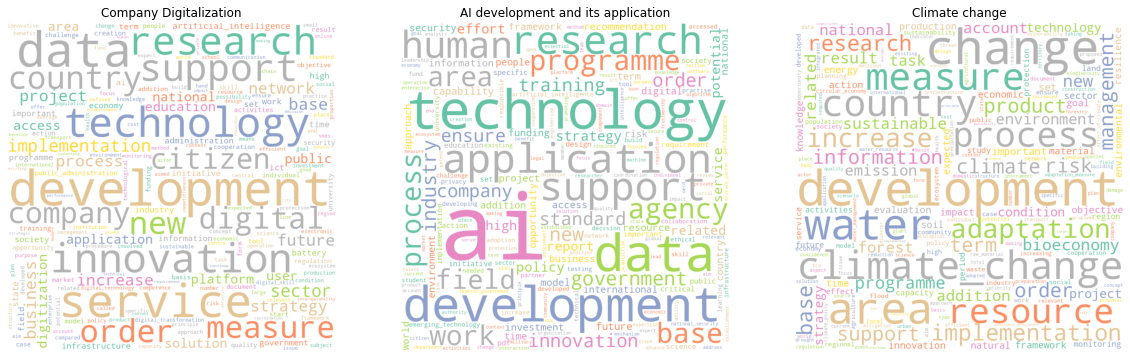

In [24]:
# Plotting common words within each community

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import STOPWORDS
stop_words = set(STOPWORDS).union(stopwords.words("english"))
stop_words = stop_words.union(['let', 'mayn', 'ought', 'oughtn', 
                               'shall'])
community_name_list = ['Company Digitalization', 'AI development and its application', 'Climate change']                              
df_community_100 = pd.DataFrame(df_community_new.paper_community.value_counts()[6:9])
df_community_100 = df_community_100.reset_index()

fig, ax = plt.subplots(1, len(df_community_100), figsize=(20, 8))
for i in range(len(df_community_100)):
    community_name = community_name_list[i]
    topic = df_community_100['index'][i]
    text = ' '.join(df_community_new.loc[df_community_new['paper_community']==topic, 'text_clean'].values)    
    wordcloud = WordCloud(width=1000, height=1000, random_state=1, background_color='White', 
                          colormap='Set2', collocations=False, stopwords=stop_words).generate(text)
    ax[i].imshow(wordcloud) 
    ax[i].set_title(f"{community_name}")
    # No axis details
    ax[i].axis("off");

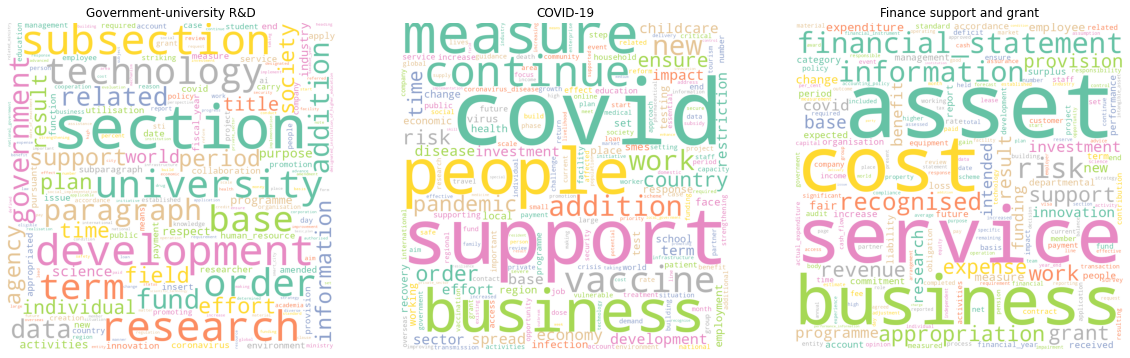

In [25]:
# Plotting common words within each community

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import STOPWORDS
stop_words = set(STOPWORDS).union(stopwords.words("english"))
stop_words = stop_words.union(['let', 'mayn', 'ought', 'oughtn', 
                               'shall'])
community_name_list = ['Government-university R&D', 'COVID-19', 'Finance support and grant']                              
df_community_100 = pd.DataFrame(df_community_new.paper_community.value_counts()[9:12])
df_community_100 = df_community_100.reset_index()

fig, ax = plt.subplots(1, len(df_community_100), figsize=(20, 8))
for i in range(len(df_community_100)):
    community_name = community_name_list[i]
    topic = df_community_100['index'][i]
    text = ' '.join(df_community_new.loc[df_community_new['paper_community']==topic, 'text_clean'].values)    
    wordcloud = WordCloud(width=1000, height=1000, random_state=1, background_color='White', 
                          colormap='Set2', collocations=False, stopwords=stop_words).generate(text)
    ax[i].imshow(wordcloud) 
    ax[i].set_title(f"{community_name}")
    # No axis details
    ax[i].axis("off");

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


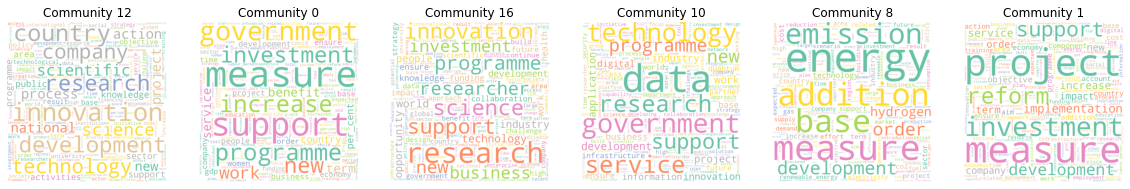

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import STOPWORDS
stop_words = set(STOPWORDS).union(stopwords.words("english"))
stop_words = stop_words.union(['let', 'mayn', 'ought', 'oughtn', 
                               'shall'])
                               
df_community_100 = pd.DataFrame(df_community_new.paper_community.value_counts()[:6])
df_community_100 = df_community_100.reset_index()

fig, ax = plt.subplots(1, len(df_community_100), figsize=(20, 8))
for i in range(len(df_community_100)):
    topic = df_community_100['index'][i]
    text = ' '.join(df_community_new.loc[df_community_new['paper_community']==topic, 'text_clean'].values)    
    wordcloud = WordCloud(width=1000, height=1000, random_state=1, background_color='White', 
                          colormap='Set2', collocations=False, stopwords=stop_words).generate(text)
    ax[i].imshow(wordcloud) 
    ax[i].set_title(f"Community {topic}")
    # No axis details
    ax[i].axis("off");

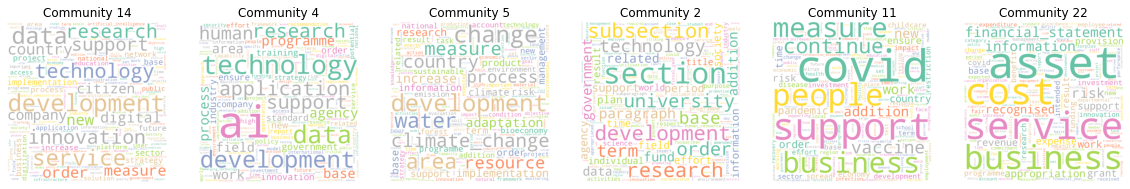

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.corpus import stopwords
from gensim.parsing.preprocessing import STOPWORDS
stop_words = set(STOPWORDS).union(stopwords.words("english"))
stop_words = stop_words.union(['let', 'mayn', 'ought', 'oughtn', 
                               'shall'])
                               
df_community_100 = pd.DataFrame(df_community_new.paper_community.value_counts()[6:12])
df_community_100 = df_community_100.reset_index()

fig, ax = plt.subplots(1, len(df_community_100), figsize=(20, 8))
for i in range(len(df_community_100)):
    topic = df_community_100['index'][i]
    text = ' '.join(df_community_new.loc[df_community_new['paper_community']==topic, 'text_clean'].values)    
    wordcloud = WordCloud(width=1000, height=1000, random_state=1, background_color='White', 
                          colormap='Set2', collocations=False, stopwords=stop_words).generate(text)
    ax[i].imshow(wordcloud) 
    ax[i].set_title(f"Community {topic}")
    # No axis details
    ax[i].axis("off");

In [2]:
len(df_community_new.paper_community.unique())

23

In [3]:
df_community_new.paper_community.value_counts()

12    37
0     34
16    30
10    27
8     24
1     17
14    16
4     14
5     14
2     13
11     9
22     9
17     8
15     7
18     6
20     5
7      4
21     3
6      3
13     2
19     2
3      2
9      2
Name: paper_community, dtype: int64

In [5]:
community_list = [12, 0, 16, 10, 8, 1, 14, 4, 5, 2, 11, 22]

In [6]:
contry_list = df_community_new.country.unique().tolist()
# contry_list

In [7]:
df_contry_community = pd.DataFrame()

In [8]:
for itm in community_list:
    df_contry_community[str(itm)] = []

In [9]:
df_contry_community ['country'] = contry_list
df_contry_community

,12,0,16,10,8,1,14,4,5,2,11,22,country
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Austria
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Australia
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Belgium
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Canada
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Switzerland
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Chile
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Costa Rica
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Germany
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Spain
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Finland


In [10]:
df_contry_community = df_contry_community[['country', '12', '0', '16', '10', '8', '1', '14', '4', '5', '2', '11', '22']]

In [11]:
list_12 = df_community_new.loc[df_community_new['paper_community']==12, 'country'].values.tolist()

In [12]:
list_12_u = set(list_12)

In [13]:
list_12_u

{'Austria',
 'Chile',
 'Costa Rica',
 'France',
 'Germany',
 'Hungary',
 'Italy',
 'Spain',
 'Switzerland'}

In [14]:
# Runing keyword analysis within each community and 

value_12_list = []
for cont in contry_list:
    if cont in list_12_u:
        value_12_list.append(1)
    else:
        value_12_list.append(0)    

In [15]:
sum(value_12_list)

9

In [18]:
# Runing keyword analysis within each community and 
for com in community_list:
    value_list = []
    for cont in contry_list:
        list_com = df_community_new.loc[df_community_new['paper_community']==com, 'country'].values.tolist()
#         list_u = set(list_com)
        if cont in list_com:
            value_list.append(1)
        else:
            value_list.append(0)
    df_contry_community[str(com)] = value_list

In [20]:
df_list_com = df_community_new.loc[df_community_new['paper_community']==com, 'country'].value_counts().to_frame()
df_list_com

,country
New Zealand,4
Switzerland,2
United Kingdom,2
Italy,1


In [27]:
for com in community_list:
    value_list = []
    df_list_com = df_community_new.loc[df_community_new['paper_community']==com, 'country'].value_counts().to_frame()
    list_u = df_list_com.index.unique().tolist()
    for cont in contry_list:
        if cont in list_u:
            value_list.append(df_list_com['country'].loc[cont])
        else:
            value_list.append(0)
    df_contry_community[str(com)] = value_list

In [28]:
df_contry_community.columns[1:].tolist()

['12', '0', '16', '10', '8', '1', '14', '4', '5', '2', '11', '22']

In [29]:
df_contry_community

,country,12,0,16,10,8,1,14,4,5,2,11,22
0,Austria,1,3,0,0,0,0,1,1,2,0,0,0
1,Australia,0,0,5,3,2,0,0,0,0,0,2,0
2,Belgium,0,3,0,0,2,1,0,0,1,0,0,0
3,Canada,0,3,5,4,2,0,0,0,0,0,0,0
4,Switzerland,2,0,0,1,0,0,1,0,0,0,0,2
5,Chile,6,0,0,0,1,0,0,1,2,0,0,0
6,Costa Rica,10,0,0,0,1,0,2,1,1,0,0,0
7,Germany,1,3,1,2,1,1,5,2,3,0,0,0
8,Spain,8,0,0,0,2,4,0,1,0,0,0,0
9,Finland,0,3,0,0,0,1,0,0,0,0,0,0


In [20]:
keywords_KCC = [
'co-authorship', 'co authorship', 'co_authorship', 
'co-ownership', 'co ownership', 'co_ownership',
'brain circulation', 'brain_circulation', 'brain-circulation',
'stakeholders engagement', 'stakeholders_engagement', 'stakeholders-engagement',
'societal engagement', 'societal_engagement','societal-engagement','societal', 'social challenge','social_challenge','social-challenge',
'in-kind', 'in_kind', 'in kind',
'civil society engagement', 'civil_society_engagement','civil-society-engagement',
'trust',
'co-funding', 'co funding', 'co_funding',
'collaborative laboratories', 'collaborative_laboratories', 'collaborative-laboratories',
'multilateral',

'platforms', 'joint', 'co_creation', 'co creation','co-creation', 
'value_chain', 'value-chain','value chain',
'tacit', 'co-patenting', 'co patenting', 'co_patenting',
'co invention', 'co-invention', 'co_invention',
'co investment', 'co_investment', 'co-investment',
'triangle', 'mobility', 'triple helix', 'triple-helix', 'triple_helix',
'long-term', 'long term', 'long_term',
'sharing', 
'open science', 'open_science', 'open-science',
'intermediar organisation', 'intermediar_organisation', 'intermediar-organisation',
'aligning']

In [21]:
len(keywords_KCC)

67

In [22]:
keywords_KT = ['knowledge transfer','knowledge_transfer','knowledge-transfer',
'contract',
'bilateral',
'one off', 'one-off', 'one_off',
'unidirectional',
'lineary model','lineary_model','lineary-model',
'short-term','short term','short_term',
'innovation vouchers','innovation_vouchers','innovation-vouchers',
'transfer',
'right',
'diffusion',
'flows',

'commercialisation',
'trade secrets','trade_secrets','trade secrets',
'spin-off', 'spin off','spin_off',
'adopt',
'absorptive capacity', 'absorptive-capacity','absorptive_capacity',
'license',
'vocational skills', 'vocational_skills', 'vocational-skills',
'brain drain', 'brain_drain', 'brain-drain']

In [23]:
len(keywords_KT)

40

In [24]:
keywords_both = keywords_KCC
keywords_both.extend(keywords_KT)
print(keywords_both)

['co-authorship', 'co authorship', 'co_authorship', 'co-ownership', 'co ownership', 'co_ownership', 'brain circulation', 'brain_circulation', 'brain-circulation', 'stakeholders engagement', 'stakeholders_engagement', 'stakeholders-engagement', 'societal engagement', 'societal_engagement', 'societal-engagement', 'societal', 'social challenge', 'social_challenge', 'social-challenge', 'in-kind', 'in_kind', 'in kind', 'civil society engagement', 'civil_society_engagement', 'civil-society-engagement', 'trust', 'co-funding', 'co funding', 'co_funding', 'collaborative laboratories', 'collaborative_laboratories', 'collaborative-laboratories', 'multilateral', 'platforms', 'joint', 'co_creation', 'co creation', 'co-creation', 'value_chain', 'value-chain', 'value chain', 'tacit', 'co-patenting', 'co patenting', 'co_patenting', 'co invention', 'co-invention', 'co_invention', 'co investment', 'co_investment', 'co-investment', 'triangle', 'mobility', 'triple helix', 'triple-helix', 'triple_helix', '

In [25]:
len(keywords_both)

107

In [26]:
communities_largest = [12, 0, 16, 10, 8, 1, 14, 4, 5, 2, 11, 22]

In [24]:
import nltk
list_list_topic_both = []
for i in range(len(communities_largest)):
    topic = communities_largest[i]
    text = ' '.join(df_community_new.loc[df_community_new['paper_community']==topic, 'text_clean'].values)    
    nltk_tokens = nltk.word_tokenize(text)
    data_analysis = nltk.FreqDist(nltk_tokens)
    # Let's take the specific words only if their frequency is greater than 3.
    filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 3])
    print('\033[1mtopic\033[0m', topic)
    list_topic = []
    for word in keywords_both:
        if word in filter_words:
            list_topic.append(filter_words[word])
#             print("%s: %s" % (word, filter_words[word]))
        else:
            list_topic.append(0)  
#             print('not found: ', word)
    list_list_topic_both.append(list_topic)

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


topic 12
topic 0
topic 16
topic 10
topic 8
topic 1
topic 14
topic 4
topic 5
topic 2
topic 11
topic 22


In [41]:
import nltk

list_list_topic_both = []
for com in community_list:
    value_list = []
    list_com = df_community_new.loc[df_community_new['paper_community']==com, 'country'].values.tolist()
    df_com = df_community_new.loc[df_community_new['paper_community']==com]
    list_u = set(list_com)
    for contcom in list_u:
            text = ' '.join(df_com.loc[df_com['country']==contcom, 'text_clean'].values)    
            nltk_tokens = nltk.word_tokenize(text)
            data_analysis = nltk.FreqDist(nltk_tokens)
            # Let's take the specific words only if their frequency is greater than 3.
            filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 3])
            print('\033[1mtopic\033[0m', com)
            print('\033[1mtopic\033[0m', contcom)
            list_topic = []
            for word in keywords_both:
                if word in filter_words:
                    list_topic.append(filter_words[word])
#             print("%s: %s" % (word, filter_words[word]))
                else:
                    list_topic.append(0)
            print(list_topic)
            for cont in contry_list:
                list_com = df_community_new.loc[df_community_new['paper_community']==com, 'country'].values.tolist()
                list_u = set(list_com)
#                 print(list_u)
                if cont in list_u:
                    
#                     print(sum(list_topic))
                    value_list.append(sum(list_topic))
                else:
#                     print(0)
                    value_list.append(0)
            df_contry_community[str(com)] = value_list
#             value_list.append(sum(list_topic))
# #             print('not found: ', word)
#             list_list_topic_both.append(list_topic)
# #             df_contry_community[str(com)] = value_list

topic 12
topic Germany
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 3, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 13, 0, 29, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 32, 0, 0, 0, 14, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 2, 33, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
topic 12
topic Spain
[0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 11, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 19, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 76, 0, 0, 0, 4, 0, 0, 1, 0, 0, 0, 0, 0, 0, 3, 0, 13, 0, 62, 11, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 54, 0, 5, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


ValueError: Length of values (48) does not match length of index (24)

In [29]:
df_topics_keywords = pd.DataFrame()

for item in range(len(communities_largest)):
    df_topics_keywords[communities_largest[item]] = list_list_topic_both[item]

In [31]:
# df_topics_keywords_norm = pd.DataFrame()
# for item in range(len(communities_largest)):
#     df_topics_keywords_norm[communities_largest[item]] = [value / communities_largest_cnt[item] for value in list_list_topic_both[item]]
   

In [32]:
df_topics_keywords['keywords'] = keywords_both
# df_topics_keywords_norm['keywords'] = keywords_both

In [33]:
df_topics_keywords = df_topics_keywords[['keywords', 12, 0, 16, 10, 8, 1, 14, 4, 5, 2, 11, 22]]
# df_topics_keywords_norm = df_topics_keywords_norm[['keywords', 12, 0, 16, 10, 8, 1, 14, 4, 5, 2, 11, 22]]

In [34]:
KCC = df_topics_keywords[:67]

In [35]:
KT = df_topics_keywords[67:]

In [37]:
KCC

,keywords,12,0,16,10,8,1,14,4,5,2,11,22
0,co-authorship,0,0,0,0,0,0,0,0,0,0,0,0
1,co authorship,0,0,0,0,0,0,0,0,0,0,0,0
2,co_authorship,0,0,0,0,0,0,0,0,0,0,0,0
3,co-ownership,4,2,0,3,7,5,0,0,0,0,0,0
4,co ownership,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
62,open-science,0,0,0,0,0,0,0,0,0,0,0,0
63,intermediar organisation,0,0,0,0,0,0,0,0,0,0,0,0
64,intermediar_organisation,0,0,0,0,0,0,0,0,0,0,0,0
65,intermediar-organisation,0,0,0,0,0,0,0,0,0,0,0,0
